##### Jacob Jawharjian
##### DS 4200 Information Visualization
##### Professor Borkin
##### 05/22/2024

# Part 3

#### 1. How is taxonomy organized? What is similar or different about each?
Taxonomy is organized by what the visualization is meant to achieve in displaying the data. Perhaps number of occurrences of values on an interval (distribution), or information regarding geographical locations (maps). What's different about each of them is the type of data that they are meant to display. Time-series data will manifest a different visualization than discrete data. 

#### 2. What is a new type of visualization you learned about on one of the two gallery pages (or, if you are already familiar with all of the visuals, what is the most interesting one to you)?
I learned about ridgeline charts. Ridgline charts are essentially stacked distributions that allow you to compare multiple distributions at once.

#### 3. Pick one plot type presented on  https://www.python-graph-gallery.com/Links to an external site. that we have not covered already during our in-class Python tutorial and implement it into a Python notebook.  As part of your notebook, include a text box which explains why you chose this visual encoding (i.e., why is it interesting to you).
Below is a heatmap. I chose a heatmap because it was grouped under the taxonomy "correlation", which also includes staple visualizations such as scatterplots, and so I was interested to see what a heatmap might have to offer that a scatterplot can't.

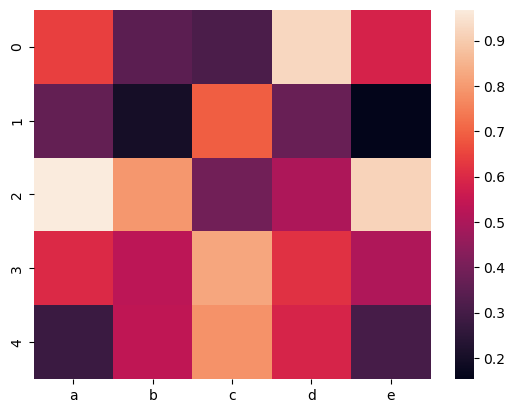

In [2]:
# library
import seaborn as sns
import pandas as pd
import numpy as np

# Create a dataset
df = pd.DataFrame(np.random.random((5,5)), columns=["a","b","c","d","e"])

# Default heatmap
p1 = sns.heatmap(df)

# Part 4

In [3]:
import matplotlib.pyplot as plt

bees_df = pd.read_csv('Assignment 3b Part 4 bee data table - Sheet1.csv', skiprows=1)
bees_df.head()

,Pollinator,Category of Pollinator,Visits to cucumber,Visits to eggplant,Visits to purple coneflower
0,Agapostemon virescens,sweat bee,7.0,3.0,136.0
1,Andrena spp.,mining bee,0.0,0.0,4.0
2,Anthidium manicatum,European wool carder bee,4.0,0.0,7.0
3,Apis mellifera,Western honey bee,72.0,3.0,13.0
4,Augochlora pura,sweat bee,3.0,0.0,0.0


The dataset includes information about bees. Their scientific name (categorical data), the type of pollinator they are (categorical data), and the number of times they visited cucumber/eggplant/purple coneflowers (discrete quantitative data).

#### 1. Plot the total number of visits to each of the three plants in the garden by all types of bumble bees and all types of sweat bees in the data, first as a bar chart and then as a line chart. 

In [4]:
plot1_df = bees_df.loc[(bees_df["Category of Pollinator"] == "sweat bee") | (bees_df["Category of Pollinator"].str.contains("bumble")==True)]
plot1_df.loc[plot1_df["Category of Pollinator"].str.contains("bumble"), "Category of Pollinator"] = 'bumblebee'

plot1bar_df = plot1_df.groupby(["Category of Pollinator"]).sum()
plot1bar_df.head()

,Visits to cucumber,Visits to eggplant,Visits to purple coneflower
Category of Pollinator,,,
bumblebee,105.0,50.0,106.0
sweat bee,138.0,19.0,212.0


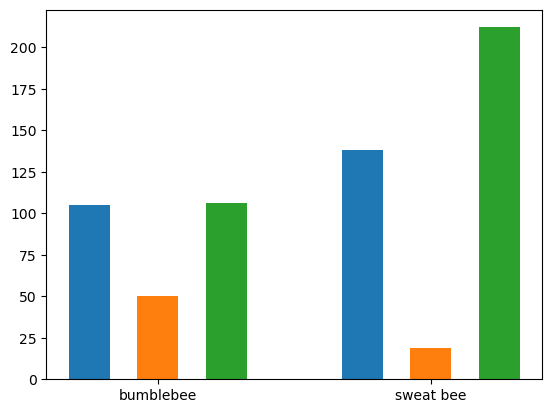

In [5]:
# the following lines define the x-labels and the y-data
bee_type = ['bumblebee', 'sweat bee']
y1 = plot1bar_df["Visits to cucumber"] 
y2 = plot1bar_df["Visits to eggplant"] 
y3 = plot1bar_df["Visits to purple coneflower"] 


# range to place bars and width of bars
x = np.arange(len(bee_type))  # the label locations
width = 0.15  # the width of the bars

# creation of bars for each type of bee
fig, ax = plt.subplots()
rects1 = ax.bar(x-width-0.1, y1, width, label='Cucumber')
rects2 = ax.bar(x, y2, width, label='Eggplant')
rects2 = ax.bar(x+width+0.1, y3, width, label='Purple Coneflower')


ax.set_xticks(x)
ax.set_xticklabels(bee_type)

plt.show()

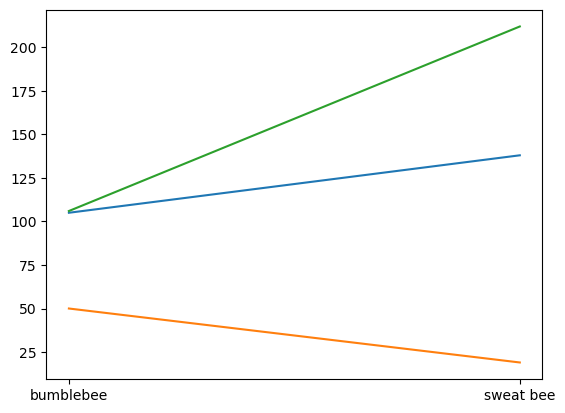

In [6]:
plt.plot(bee_type, y1)
plt.plot(bee_type, y2)
plt.plot(bee_type, y3)
plt.show()

Between the line chart and the bar chart, I would choose the bar chart. In terms of effectiveness, the bar chart properly and clearly portrays the quantities associated with each plant/bee. In terms of expressiveness, a bar chart is more suited to categorical data. The line chart assumes some type of relationship, and this data does not convey one. Thus a bar chart is better suited to display the categorical bee and plant data, as well as the quantities that accompany them. 

##### 2. Polished Bar Chart

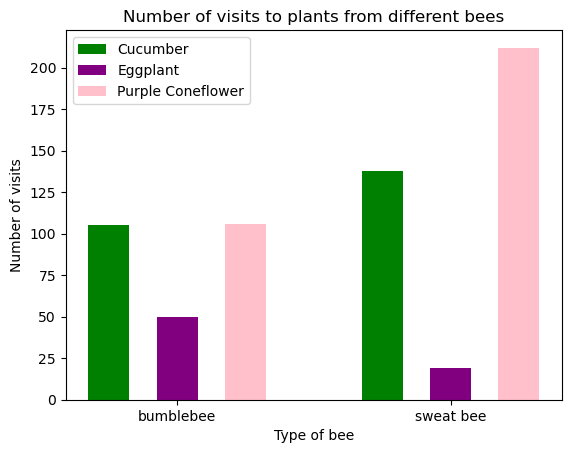

In [7]:
fig, ax = plt.subplots()
rects1 = ax.bar(x-width-0.1, y1, width, label='Cucumber', color='green')
rects2 = ax.bar(x, y2, width, label='Eggplant', color='purple')
rects3 = ax.bar(x+width+0.1, y3, width, label='Purple Coneflower', color='pink')

ax.set_xticks(x)
ax.set_xlabel("Type of bee")
ax.set_ylabel("Number of visits")
ax.set_title("Number of visits to plants from different bees")
ax.set_xticklabels(bee_type)
ax.legend()

plt.show()

##### Compare plots

In [8]:
plant_type = ['Cucumber', 'Eggplant', 'Purple Coneflower']

pollinator_df = plot1_df.groupby(["Pollinator"]).sum()
pollinator_df.head()

,Visits to cucumber,Visits to eggplant,Visits to purple coneflower
Pollinator,,,
Agapostemon virescens,7.0,3.0,136.0
Augochlora pura,3.0,0.0,0.0
B. griseocollis,0.0,3.0,28.0
B. impatiens,104.0,44.0,61.0
Bombus bimaculatus,0.0,3.0,16.0


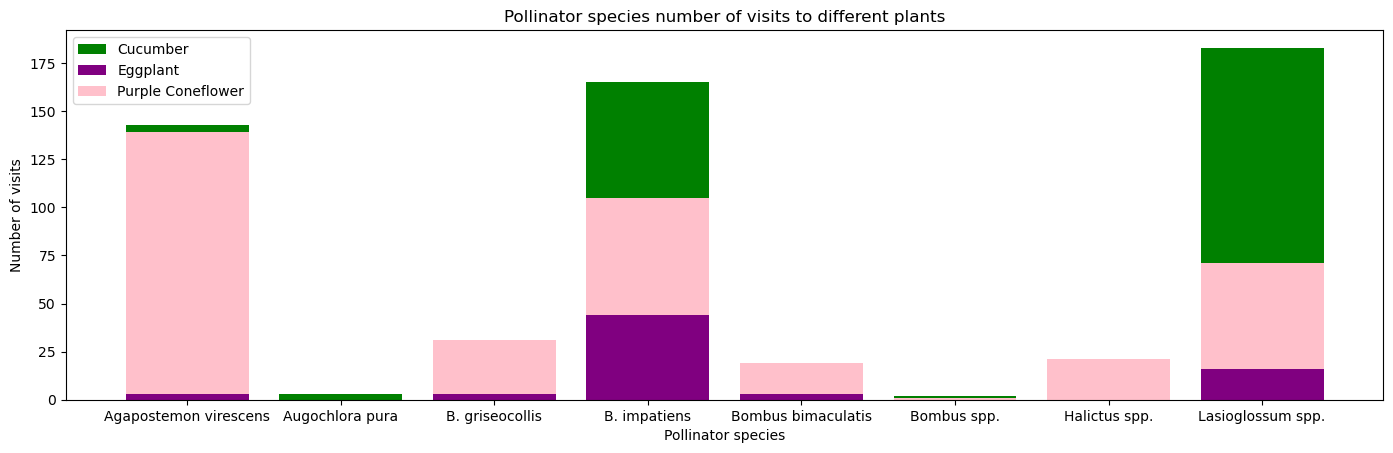

In [9]:
pollinator_type = ['Agapostemon virescens', 'Augochlora pura', 'B. griseocollis', 'B. impatiens', 'Bombus bimaculatis', 'Bombus spp.', 'Halictus spp.', 'Lasioglossum spp.']
plant_type = ['Cucumber', 'Eggplant', 'Purple Coneflower']


compy1 = pollinator_df['Visits to cucumber']
compy2 = pollinator_df['Visits to eggplant']
compy3 = pollinator_df['Visits to purple coneflower']

plt.figure().set_figwidth(17)


plt.bar(pollinator_type, compy1, color='green', bottom=compy3)
plt.bar(pollinator_type, compy2, color='purple')
plt.bar(pollinator_type, compy3, color='pink', bottom=compy2)

plt.title('Pollinator species number of visits to different plants')
plt.xlabel('Pollinator species')
plt.ylabel('Number of visits')


plt.legend(plant_type)

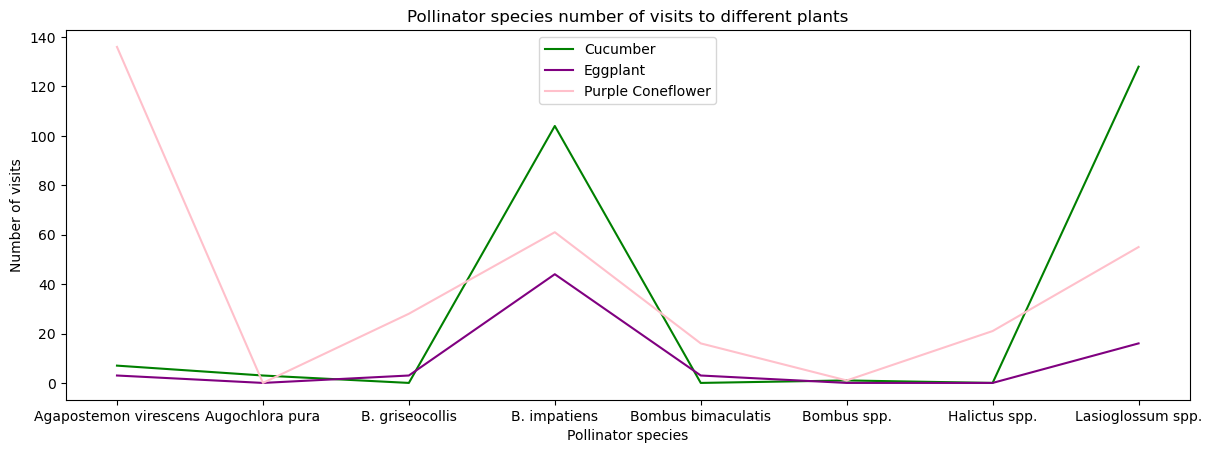

In [10]:

plt.figure().set_figwidth(14.5)


plt.plot(pollinator_type, compy1, color='green')
plt.plot(pollinator_type, compy2, color='purple')
plt.plot(pollinator_type, compy3, color='pink')


plt.legend(plant_type)


plt.title('Pollinator species number of visits to different plants')
plt.xlabel('Pollinator species')
plt.ylabel('Number of visits')

plt.show()

From these two visualizations it appears that the cucumber plant receives the most visits from pollinators, namely B. impatiens and Lasioglossum spp. Next is the purple coneflower, receiving most of its visits from Agapostemon virescens. The eggplant receives the least amount of visits out of the three plants. Between these two visualizations I think the parallel coordinate chart visualizes the data better because the data is not aggregated (stacked), so the viewer doesn't have to estimate where each value starts. Ideally, though, I think the best visualization for this would be either a side-by-side bar chart (which isn't achievable with this data as there is no categorical data referring to plants individually), or a bar chart that isn't stacked, but rather optimizes the z-order such that the tallest bar, no matter the color, is in the back, and the smallest is in the front. I attmepted to play around with the z-order in constructing the bar chart but there was no order in which the data was properly visualized for every pollinator category.

##### Identify plots

In [11]:
plot1bar_df.head()

,Visits to cucumber,Visits to eggplant,Visits to purple coneflower
Category of Pollinator,,,
bumblebee,105.0,50.0,106.0
sweat bee,138.0,19.0,212.0


Text(0, 0.5, 'Garden vists')

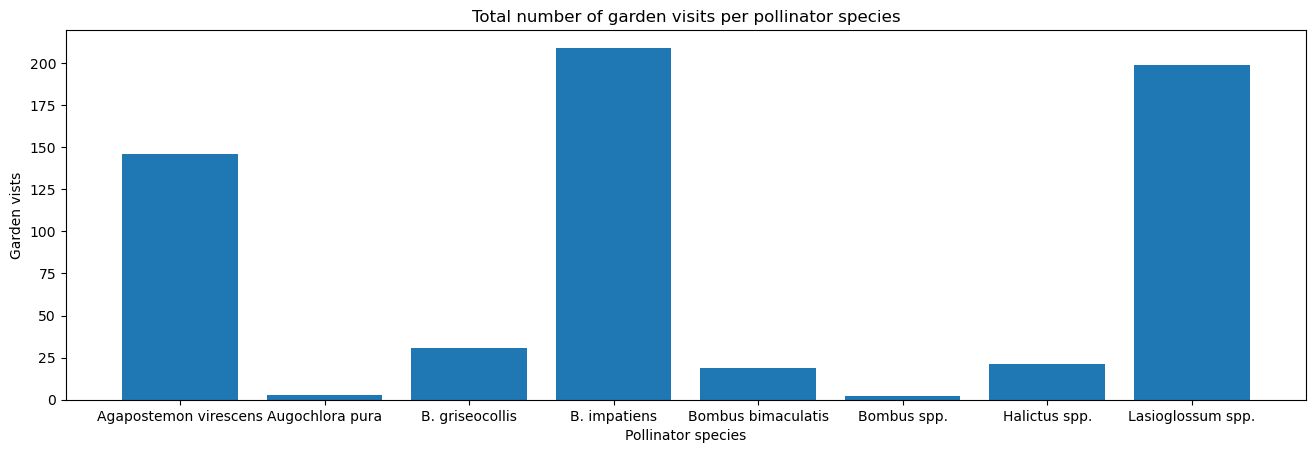

In [12]:
pollinator_df['Total visits'] = pollinator_df['Visits to cucumber'] + pollinator_df['Visits to eggplant'] + pollinator_df['Visits to purple coneflower']

plt.figure().set_figwidth(16)
plt.bar(pollinator_type, pollinator_df['Total visits'])
plt.title('Total number of garden visits per pollinator species')
plt.xlabel('Pollinator species')
plt.ylabel('Garden vists')

([<matplotlib.patches.Wedge at 0x7f7c2547a8e0>,
 [Text(0.8211195223997447, 0.7319581476655721, 'Agapostemon virescens'),
  Text(0.10952462314766731, 1.0945338537132425, 'Augochlora pura'),
  Text(-0.07673213260527917, 1.0973204544825754, 'B. griseocollis'),
  Text(-1.0495002120564019, 0.32946821530091147, 'B. impatiens'),
  Text(-0.7401108241820442, -0.8137788200294817, 'Bombus bimaculatis'),
  Text(-0.6509933698479883, -0.8866835018279976, 'Bombus spp.'),
  Text(-0.5452426759973455, -0.9553587934756522, 'Halictus spp.'),
  Text(0.6014013747667358, -0.921040925490654, 'Lasioglossum spp.')])

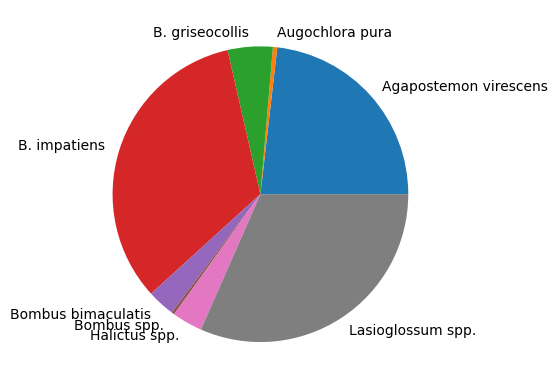

In [13]:
plt.pie(pollinator_df['Total visits'], labels=pollinator_type)

I think the bar chart is a better visualization for displaying total visits to the garden by each type of bee. The pie chart does not explicitly display how many times each bee visited the garden (although it could, I just don't know how to include that). I also don't think that this data needs to be displayed as two components of a broader whole, the way that a pie chart suggests. I think they are independent quantities, which is better embodied through a bar chart.